In [36]:
from textblob import TextBlob
import codecs
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
f = codecs.open('Shadows_of_Amn_TOB_GD.txt', encoding='latin-1', mode='r')
good_story_text = f.read()
f.close()

In [4]:
good_story_text

'Portions copyright ( 2000, 2001 by BioWare Corp. All rights reserved.\r\n\r\nTrademarks are property of their respective owners.\r\n\r\n\r\n\r\n\r\nIntroduction\r\n============\r\nIn my opinion, the biggest improvements in Baldur\'s Gate II: Shadows of Amn are the well developed personalities of the characters who can join your party, and the better developed main plot and generally interesting and involved side quests.\r\n\r\nI thought it would be worthwhile to recreate the game\'s story in written form, in the game\'s own words. All of the dialog in the following is taken almost unchanged directly from the game itself, as well as some of the other material. In order to create a full story, I did have to invent a lead character, as well as pick a particular path through the game.\r\n\r\nI am assuming you have already played the game itself, but you might want to read this to experience the story again, or to hear from characters you chose not to include in your party.\r\n\r\nIn order

In [5]:
bad_story = codecs.open('BGSOAEV.txt', encoding='latin-1', mode='r')
bad_story_text = bad_story.read()
bad_story.close()

In [6]:
#Trial befor cleaning
good_blob = TextBlob(good_story_text)
evil_blob = TextBlob(bad_story_text)

In [7]:
good_sentiment = [sentence.sentiment.polarity for sentence in good_blob.sentences]
evil_sentiment = [sentence.sentiment.polarity for sentence in evil_blob.sentences]

In [8]:
good_sentiment_accruement = []
evil_sentiment_accruement = []
good_score = 0
evil_score = 0
for sentiment in good_sentiment:
    good_score += sentiment
    good_sentiment_accruement.append(good_score)
for sentiment in evil_sentiment:
    evil_score += sentiment
    evil_sentiment_accruement.append(evil_score)

In [34]:
len(evil_sentiment)

14000

In [35]:
len(good_sentiment)

24500

The two stories that traverse the same time and direction but just with different intent have greatly varying lengths of dialogue.

In [11]:
evil_sentimet = np.asarray(evil_sentiment)
good_sentiment = np.asarray(good_sentiment)
good_sentiment_accruement = np.asarray(good_sentiment_accruement)
evil_sentiment_accruement = np.asarray(evil_sentiment_accruement)

In [12]:
evil_sentiment_accruement = evil_sentiment_accruement/max(evil_sentiment_accruement)
good_sentiment_accruement = good_sentiment_accruement/max(good_sentiment_accruement)

/Users/johnrumpel/anaconda/envs/nlp/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


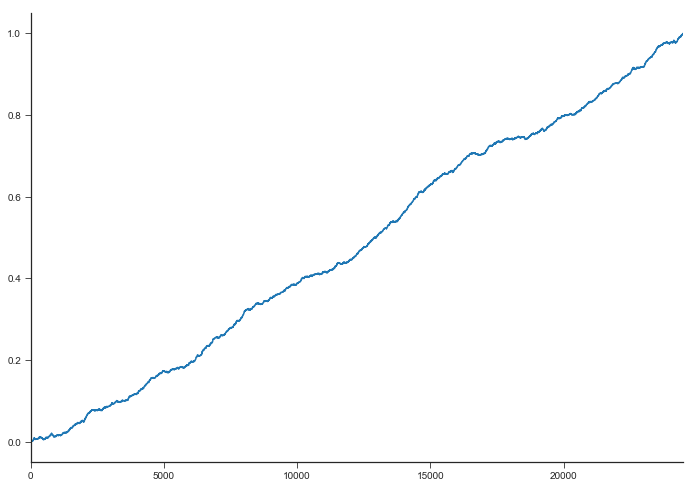

In [13]:
sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
sns.tsplot(data=good_sentiment_accruement, ax=ax)    
sns.despine()

/Users/johnrumpel/anaconda/envs/nlp/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


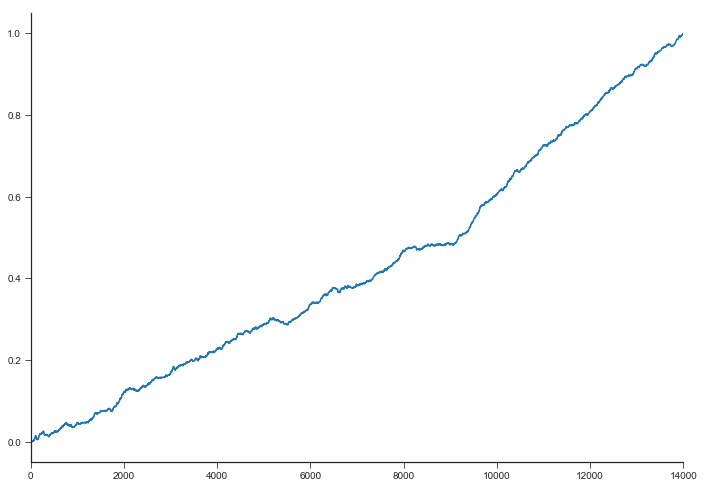

In [14]:
sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
sns.tsplot(data=evil_sentiment_accruement, ax=ax)    
sns.despine()

In [16]:
good_sentiment_s = [sentence.sentiment.subjectivity for sentence in good_blob.sentences]
evil_sentiment_s = [sentence.sentiment.subjectivity for sentence in evil_blob.sentences]

In [17]:
good_sentiment_s_accruement = []
evil_sentiment_s_accruement = []
good_s_score = 0
evil_s_score = 0
for sentiment in good_sentiment_s:
    good_s_score += sentiment
    good_sentiment_s_accruement.append(good_s_score)
for sentiment in evil_sentiment_s:
    evil_s_score += sentiment
    evil_sentiment_s_accruement.append(evil_s_score)

In [18]:
evil_sentimet_s = np.asarray(evil_sentiment_s)
good_sentiment_s = np.asarray(good_sentiment_s)
good_sentiment_s_accruement = np.asarray(good_sentiment_s_accruement)
evil_sentiment_s_accruement = np.asarray(evil_sentiment_s_accruement)

evil_sentiment_s_accruement = evil_sentiment_s_accruement/max(evil_sentiment_s_accruement)
good_sentiment_s_accruement = good_sentiment_s_accruement/max(good_sentiment_s_accruement)

/Users/johnrumpel/anaconda/envs/nlp/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


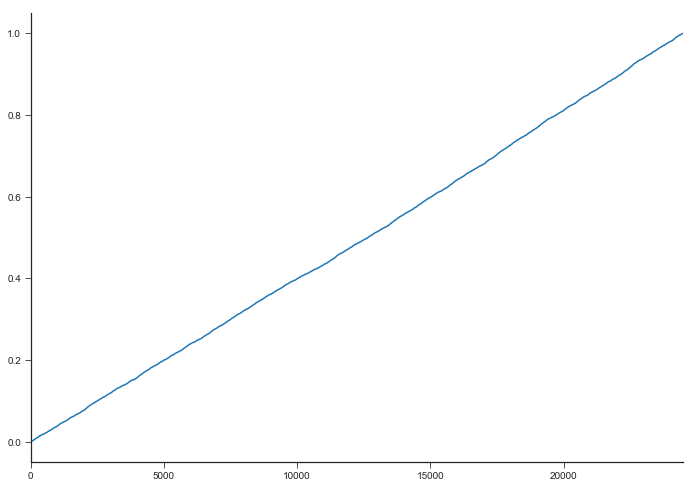

In [29]:
sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
sns.tsplot(data=good_sentiment_s_accruement, ax=ax)    
sns.despine()

/Users/johnrumpel/anaconda/envs/nlp/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


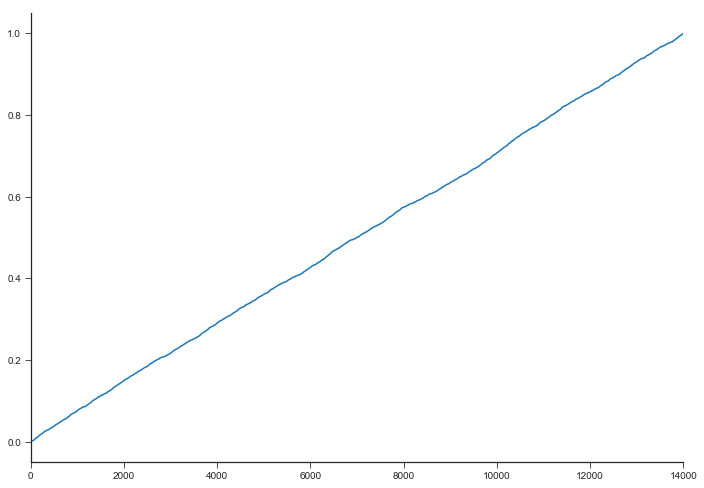

In [30]:
sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
sns.tsplot(data=evil_sentiment_s_accruement, ax=ax)    
sns.despine()

In [19]:
evil_blob.sentences[80]

Sentence("Jaheira is what I am called, as you should well know.")

In [24]:
evil_blob.sentences[1000].sentiment.polarity

-0.3333333333333333

In [25]:
evil_blob.sentences[1000].sentiment.subjectivity

0.6666666666666666

In [33]:
for sentence in evil_blob.sentences:
    print(sentence, sentence.sentiment.polarity)
    print('\n')

Portions copyright ( 2000 by BioWare Corp. All rights reserved. 0.0


Trademarks are property of their respective owners. 0.0


Introduction
In my opinion, the biggest improvements in Baldur's Gate II: Shadows of Amn are the well developed personalities of the characters who can join your party, and the better developed main plot and generally interesting and involved side quests. 0.2733333333333333


I thought it would be worthwhile to recreate the game's story in written form, in the game's own words. 0.07499999999999998


All of the dialog in the following is taken almost unchanged directly from the game itself, as well as some of the other material. -0.10625000000000001


In order to create a full story, I did have to invent a lead character, as well as pick a particular path through the game. 0.03888888888888886


I am assuming you have already played the game itself, but you might want to read this to experience the story again, or to hear from characters you chose not to include



He was trailed by a guard carrying a halberd. 0.0


"Argh, not again," complained Jan. "That bottom-feeding, turnip-hating, scum-sucking brigand! -0.375


Nothing better to do than stop an honest business man from selling high quality illegal Flashers for a reasonable price. 0.192


Here he comes, cover for me." 0.0


"Jan Jansen, gnomish citizen of Amn," said the man formally, "you have been charged with tax evasion and the illegal sale of illegal items in an illegal manner." -0.5


"Trax, old friend," Jan said ingratiatingly. 0.1


"You do me a great wrong! 0.08750000000000002


I would never break the law. 0.0


As my pappy always said..."
"Enough!" 0.0


yelled Trax. 0.0


"You'll not sidetrack me with your cursed tales again. 0.0


I'm smarter than you think!" 0.0


Trax's guard couldn't hold back a snicker at this statement. 0.0


"Shutup, you! 0.0


Latrine duty beckons," said Trax to the guard, who abruptly stood to attention. -0.125


"That's better." 0.5


Trax addressed Ja

Get going." 0.0


Leaving Mae'Var, they climbed to the top floor of the guild. 0.5


There a mage dressed in red greeted them. 0.0


"Greetings. 0.0


I am Edwin Odesseiron. 0.0


You simians may refer to me merely as 'Sir,' if you prefer a less... syllable intensive workout." -0.3333333333333333


"Edwin! 0.0


Don't you recognize me? 0.0


It's Tamarth," said Tamarth excitedly. 0.375


He had worked for a time with Edwin near Baldur's Gate, and remembered him as a competent spellcaster. 0.3


"The past hardly matters. -0.27083333333333337


The company you currently keep now limits your use. 0.0


No matter, I shall make this transaction as quick and bloodless as possible. 0.16666666666666666


Hear me. 0.0


It seems my prowess as a mage has captured the eye of the Cowled Wizards. 0.0


I'm certain they are envious, though their actions are not fitting tribute. -0.017857142857142863


They have dispatched an agent to investigate my activities, something I don't appreciate. 0.0


Thi



She sneaks out now and then and skulks around our taverns and such, as if it makes her 'understand' us." 0.0


"How many trolls did you think were still here?" 0.5


"Maybe thirty. 0.0


There was a big troll that seemed to be in charge. 0.0


I've kept out of sight, but I also heard him bossing something called a 'yuan-ti.' 0.0


I don't know how many of those there are." 0.5


"And how many of your fellows did you think were still alive?" 0.3


"I don't know. 0.0


I seen a few make a break for it, but they were killed as they ran. -0.2


Maybe a few are hidden here or there. -0.18333333333333335


I know Lord Arnise is still alive, at least he was this morning. -0.09999999999999999


He was trying to get the parts for his flail. 0.0


He keeps it in pieces, and would never say why he left it like that. 0.0


Wasn't my place to ask, really. 0.2


Probably took him down to the dungeon. -0.15555555555555559


Lord Arnise had his dungeon boarded up, but I think them trolls sniffed it 


"Rumors and hearsay," said the female. 0.0


"I am here before you as the proverbial horse's mouth. 0.0


You may take what I say at my word, or you will end like all the others will." 0.0


"See, there you go threatening. 0.0


Though I suppose my own guild has threatened no less. 0.3416666666666667


I just don't know." 0.0


"You know. 0.0


You just haven't said it out loud yet." 0.1


Tamarth crept closer. 0.0


He could make out a woman and two men, standing next to the seawall. 0.0


"Perhaps, but I... " started the male voice. 0.0


Then, "Wait, someone is listening to us! 0.0


Get out of here before they see us! 0.0


Go! 0.0


We'll take care of these spies." 0.0


The two males attacked, and were killed. -0.2


Looking at the bodies, it was obvious they had been Shadow Thieves. 0.0


The woman had fled, although it was not clear how. -0.05000000000000001


Tamarth assumed she must be a vampire. 0.0


Tamarth decided to spend the night at the nearby Sea's Bounty. 0.0


As t

"That way is?" 0.0


"We must kill the druids before they can kill us. 0.0


We must destroy their source of power so that this can never happen again. -0.2


We must exorcise the Grove of its evil spirit. -1.0


The Grove derives its evil magic from a 'holy font' within the druid's lair. -0.25


You, my friend, shall destroy the source and weaken the druids. -0.2


Mopping up will be simple when the font is gone." 0.0


"The plan has merit," said Tamarth, stringing him along. 0.0


"Do you have a plan for destroying this 'holy font'?" -0.2


"I have obtained a bottle of sulphurous poison. 0.0


Find the font and pour the poison into it. 0.0


The druids will be weakened and easily disposed of. 0.43333333333333335


Will you do it?" 0.0


"Why don't you simply do it yourself?" 0.0


asked Tamarth. 0.0


"Are you deaf? 0.0


The 'honorable' High Merchant has threatened to kill me if I approach the Grove. 0.16


In any case, you are more suited to this sort of work than one of my high br

They've caught me!" 0.0


"Pretty pretty cattle, you cannot run," hissed the female. 0.16666666666666666


"Ahh, you have found some helpers to aid in your chase. 0.0


I wonder if your saviors will prove as useful as you hope. 0.3


Ahh, I know of this one. 0.0


Tamarth, I believe. 0.0


You are spared our wrath because of choices to come. 0.0


Leave this place, and leave this creature to us. 0.0


You are allied to neither of us yet." 0.0


Tamarth looked at the first man, who he now realized to be a Shadow Thief. 0.25


He was already doomed, since the three vampires could kill him before anyone could intervene. 0.0


Tamarth saw no advantage to getting involved. 0.0


"Then he is yours. 0.0


I have no stake in your conflict." 0.0


The three vampires leaped at the Shadow Thief, bringing him down. -0.15555555555555559


Moments later, the three arose and hurried back into the alley, carrying a body. 0.0


The Shadow Thieves were not doing at all well in their guild war. 0.0


The

Unusable if you do not know the proper incantations. 0.0


I would like it back. 0.0


The imp has likely escaped to the sewers... and your travel there would save me the time and aggravation of retrieving it. 0.0


A word of caution... the imp may have picked up an incantation or two and may have... used... the mirror. 0.0


One can only guess what it might have summoned up." 0.0


"Very well... 0.2


I shall seek out this item and return." 0.0


"Run along, then, and return once you have the mirror." 0.0


The party returned to the sewers. 0.0


Luckily, the imp was still nearby. 0.3333333333333333


When they found it, the imp and its summoned helpers were easily defeated. 0.43333333333333335


Really, thought Tamarth, the task had been quite easy, if he ignored the constant complaints from Edwin about the smell. 0.2111111111111111


Unfortunately, the magical mirror had been dropped and shattered in the struggle. 0.0


Tamarth's plan to keep the item for himself if it proved powerf


Rest." 0.0


The avatar disappeared, the followers collapsed, finally at peace in death. 0.0


Tamarth wondered at the play Haer'Dalis could write, the last whimper of a dead god. -0.1


They exited the sewers, all of them ready to find rest for the night. 0.2


"Oh, hello... why... HELLO, there," said a woman they passed. 0.0


"It's been a while since I've seen a well-dressed gentleman of such obvious well-breeding. 0.0


You would be... hmmn... Thayvian, perhaps?" 0.0


"Are you referring to me?" 0.0


said Edwin. 0.0


"Watch who you address with over-familiarity, commoner wench, lest I slap you to the ground and keep you there!" 0.0


Viconia took the opportunity to talk to Tamarth as they walked. 0.0


"What was life like before you were an adventurer? 0.0


Didn't it seem simpler, less complicated?" -0.3333333333333333


"It did, didn't it?" 0.0


replied Tamarth wryly, not having had any real peace since he left Candlekeep. 0.1


"It would be nice, wouldn't it Tamarth? 0.6


T

"You've walked right into our web, fool!" 0.3571428571428571


said a thief stepping from the shadows. 0.0


"Take no prisoners! 0.0


We must protect Aran!" 0.0


More thieves appeared around them. 0.5


"I wondered if you might eventually drag yourself over to me," said the mage Haz, also having stepped into view. -0.1


"I'm afraid your mistress Bodhi shall have to remain in her graveyard lair. -0.6


Your little invasion shall end here and her plans with it!" -0.234375


This battle proved more difficult, but the thieves proved no match for the ferocity of Tamarth and Korgan, backed by the others. 0.0


The key taken from the mage's body allowed them entry to a final section of the guild. 0.0


They found Aran Linvail with several guards huddled in his room. 0.0


"I admit I never thought that the bitch Bodhi would have the courage to invade," said Aran Linvail. 0.0


"No matter. 0.0


You shall be the first to fall!" 0.3125


Instead it was Linvail, guildmaster of guildmasters, wh

With a cry of rage Tamarth attacked the demon. 0.0


His blows passed though its body, without effect. 0.0


When he tried to move forward, the demon blocked his progress, its form suddenly solid enough to stop him. 0.0


He had no choice but to give in. 0.0


"I give of my wits and the wisdom I have learned," said Tamarth, offering what he valued the least. -0.3


"Then you shall come to know yourself through your mistakes, when you undoubtedly falter with foolishness. 0.0


A fool can learn much that a scholar does not see. 0.2


You shall know more of yourself through what you have lost. 0.5


A gesture of your intent within. 0.0


Pass as you should, and do not fear what comes." 0.0


The demon disappeared, allowing Tamarth to enter the keep. 0.0


The shelves of books in the large room he was in was much as he remembered it, but the main stair in the center of the room twisted like a corkscrew as he looked up it. -0.003809523809523818


He continued towards the back of the room, w

In the normal course of things, creatures captured from the sun lands would be dinner for our plate. 0.15


This once, however, is different. 0.0


Sekolah has told of your coming in an ancient prophecy, and I have scryed that you are whom the Shark-Father speaks of." 0.0


Jan stared at Tamarth in mock wonder. 0.0


"Wow. 0.1


Does this happen to you often, Tamarth? 0.0


I get the feeling that you could fall off a mountain, tumble down a hill and through a hole into a pit and then land smack in a nest of fire giants and they would suddenly hail you as the Second Coming of Grahz. -0.051851851851851864


I should take you sometime to the wilds of Chult... it could be quite profitable, you never know." 0.0


The High Priestess spoke to them. 0.16


"The most exalted King Ixilthetocal calls for the presence of the prophesized ones, now, but there is time for you to ask questions if you have the desire." 0.5


"What manner of creature are you?" 0.0


asked Tamarth. 0.0


"Your kind has m

I shall make it a forbidden area forever after. 0.0


Thank you, Tamarth, you do not know the good you have done here." 0.7


Tamarth had allowed himself to be talked into the task, although he didn't know if this mysterious 'Adalon' would be of any more help than the gnomes. 0.25


At least, he consoled himself, the creature should be no problem for his party to defeat. -0.3


When they reached the correct chamber, they found the creature they faced was in fact a powerful demon. 0.3


Tamarth was pleased; this was the test he had been looking for. 0.5


He forced the transformation to the slayer aspect of Bhaal. -0.30000000000000004


Although the others helped, he was able to control the slayer, inflicting great wounds on the demon and ultimately destroying it. 0.3666666666666667


Tamarth was gratified at the increase in his personal power. 0.0


The party returned to the deep gnome leader, for their reward. 0.0


By talking to other gnomes in the city Tamarth was also able to retri

Those of my House would be the first questioned for his death... but you, without allies of any House, can get away with his murder. 0.25


Once you are done, take his... hmmm... take his piwawfi cloak and bring it back to me here. 0.0


It shall make an excellent trophy. 1.0


That is all. 0.0


Do you understand what I ask of you, Veldrin? 0.0


Telling anyone will bring death down upon yourself. -0.15555555555555559


I shall keep your secret if you keep mine." -0.4


"I understand... and I look forward to killing that arrogant bastard." 0.0


Truthfully, Tamarth was fed up with the gloomy Solaufein. 0.5


"It is good to see a drow male with a commendable lust for power. 0.35


Continue this attitude, Veldrin, and things in Ust Natha will prove favorable for you. 0.0


Go, then. 0.0


You have three days to hunt down the fool and return with his cloak. -0.15555555555555559


Do not fail me, Veldrin." 0.25


"Before we leap upon our target, my raven," said Haer'Dalis after they left,

He knew she had done many things most surfacers would condemn her for, but then so had he. 0.5


He found himself on the verge of a closeness with her that attracted him greatly, and he would not give it up simply because she was afraid of it. 0.0666666666666667


"I have seen the true you that lies within, and this is not it. 0.35


You do not need to do this!" 0.0


"Bastard! 0.0


Stubborn bastard!! 0.0


Jal khaless zhah waela! 0.0


Why must I trust you?! 0.0


WHY?! 0.0


In trust lies death!! 0.0


Leave me alone! 0.0


I will not be dominated! 0.0


Stay away!!" 0.0


They rested a while to recover their magical energy, then moved on, to the cave of Adalon. 0.5


When they entered the cave, the great dragon let forth a mighty roar, powerful enough that small rocks dislodged from the ceiling, raining on the party below. 0.25000000000000006


Adalon bellowed forth her pain. 0.0


"You return! 0.0


You show amazing gall to come here! 0.7500000000000001


Have you the fortitude to



Consider the brutish Viconia here. 0.0


How difficult is it to lose someone when you have only just discovered such feelings?" -0.16666666666666666


"I have no fear of losing Tamarth to the likes of you," said Viconia. 0.0


"But does he fear your loss? 0.0


Let's find out. 0.0


Follow me further Tamarth, and you will lose more than you can fathom. 0.25


Starting now!" 0.0


Several vampires attacked the party from the shadows. 0.0


The party defeated them, but somehow Viconia had disappeared in the fighting. 0.0


Tamarth was enraged. 0.0


He hurried for the nearest entry to the underground, forgetting his carefully laid plans. -0.1


The remaining members of the party, Jan, Korgan, Haer'Dalis, and Edwin, followed him. 0.0


"My mistress bids you welcome, Tamarth," greeted a female vampire when he entered the lair. 0.4


Tamarth quickly led the others in destroying her, and cleansing the upper level of the lair of opponents. 0.04444444444444443


Although Tamarth had forgotte


Your power over this place has summoned forth my essence once again. 0.0


And why do you think you have done that? 0.0


I can teach you how to use your wrath. 0.0


You can control the taint, direct it, summon it at will! 0.125


You can become the Slayer at will and become the weapon of murder that you were meant to be! 0.0


So think of me! 0.0


Think of how I destroyed your precious Gorion! 0.625


How I plundered the lives of your Candlekeep! 0.0


Summon your rage, stir the depths of your black heart! -0.20833333333333331


Summon wrath! 0.0


Summon wrath and *become* it! 0.0


Because if you cannot, then you are not worth your destiny! -0.1875


It should have been I! 0.0


It should have been I!" 0.0


Sarevok raised his sword over his head, shouting out his challenge. 0.0


"ATTACK ME, WORM, IF YOU DARE!!" 0.0


In a flash of insight Tamarth realized he and Sarevok weren't that different. 0.0


They had both sought the power inherent in their divine heritage. 0.0


The onl

I don't exactly agree with the sentiments that textblob gives each of these sentences. I think it may be better to train a sentiment model then use that to measure sentiment?

In [37]:
story_data = {'sentence': [str(sentence) for sentence in good_blob.sentences],
              'story_type': ['good' for sentence in good_blob.sentences],
              'subjectivity': good_sentiment_s, 'polarity': good_sentiment}

In [38]:
story_data_evil = {'sentence': [str(sentence) for sentence in evil_blob.sentences],
              'story_type': ['evil' for sentence in evil_blob.sentences],
              'subjectivity': evil_sentiment_s, 'polarity': evil_sentiment}

In [41]:
story_dataframe_good = pd.DataFrame(data=story_data)
story_dataframe_evil = pd.DataFrame(data=story_data_evil)

In [42]:
frames = [story_dataframe_good, story_dataframe_evil]

In [43]:
story_dataframe = pd.concat(frames)

In [45]:
story_dataframe.tail()

,sentence,story_type,subjectivity,polarity
13995,whispered a third.,evil,0.000000,0.000000
13996,"A new voice decisively spoke, ending the discu...",evil,0.454545,0.136364
13997,"""This spawn of Bhaal is doomed.",evil,0.000000,0.000000
13998,"There is no escape.""",evil,0.000000,0.000000
13999,77\r\n\r\n\r\nii\r\n\r\n\r\nShadows of Amn: Th...,evil,1.000000,-1.000000
